In [17]:
%matplotlib inline 


import numpy as np #To use functions or constants that are in the NumPy module, type np.function_name. EG: np.pi is pi
import numpy.random as nprd #This imports random number generation functions
import scipy as sp #SciPy has lots of useful numerical methods, so we don't have to write them
import scipy.linalg as spla #This imports the sub-module containing linear algebra methods
import matplotlib.pyplot as plt #This will let us display images nicely
import cv2
import os
#import pandas as pd 
from scipy import ndimage


from __future__ import print_function

from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC



In [24]:
#Load images in from fodler into a dictionary 
def load_images_from_folder(folder):
    images_dict = {}
    i=0
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            images_dict[i]=img
            i=i+1
    return images_dict , i
folder="X:\\Physics\\ResearchProjects\\RWBowman\\RC-PH1201\\Malaria_Diagnostic_Microscopy\\Project\\SAMBa Reading Project MDuff\\Malaria-Imaging-Code\\Cropped, Rotated\\"
images_dict, no_images=load_images_from_folder(folder)

In [25]:
images_dict, no_images

({0: array([[150, 152, 155, ..., 130, 128, 122],
         [153, 154, 157, ..., 132, 134, 132],
         [157, 154, 152, ..., 133, 135, 134],
         ...,
         [156, 157, 151, ..., 142, 142, 142],
         [158, 158, 148, ..., 145, 141, 140],
         [157, 155, 152, ..., 145, 139, 141]], dtype=uint8),
  1: array([[126, 125, 122, ..., 138, 141, 148],
         [126, 125, 125, ..., 138, 138, 144],
         [125, 125, 125, ..., 140, 138, 142],
         ...,
         [156, 152, 148, ..., 143, 141, 141],
         [152, 150, 147, ..., 148, 140, 140],
         [151, 151, 149, ..., 147, 137, 143]], dtype=uint8),
  2: array([[146, 147, 149, ..., 150, 151, 149],
         [143, 144, 145, ..., 148, 148, 142],
         [142, 142, 143, ..., 145, 144, 143],
         ...,
         [149, 150, 146, ..., 144, 146, 146],
         [152, 148, 143, ..., 146, 148, 142],
         [150, 145, 142, ..., 146, 147, 140]], dtype=uint8),
  3: array([[155, 158, 151, ..., 146, 147, 143],
         [158, 156, 152, ..

In [26]:
#Average width and height

x_total=0
y_total=0
for i in range(no_images):
    (y,x)=np.shape(images_dict[i])
    x_total+=x
    y_total+=y
x_mean=int(x_total/no_images)
y_mean=int(y_total/no_images)
x_mean, y_mean

(147, 184)

In [27]:
#resize all images and add to a new dictionary 
resized_img_dict={}
for i in range(no_images):
    img=images_dict[i]
    res = cv2.resize(img,(147, 184), interpolation = cv2.INTER_CUBIC)
    resized_img_dict[i]=res
    
    

In [28]:
#All images as a vector. 
vector_img_dict={}
all_img=()
for i in range(no_images):
    img=resized_img_dict[i]
    vector_img_dict[i]=img.flatten(order='F').astype(np.float)
arrays = [vector_img_dict[i] for i in range(no_images)]
all_data=np.stack(arrays, axis=0)

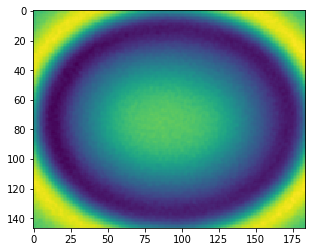

In [29]:
#PCA THINGS!!!!

#Find the mean image 
sum_img_vector=np.zeros(x_mean*y_mean)
for i in range(no_images):
    sum_img_vector+=vector_img_dict[i]

mean_img_vector=sum_img_vector/no_images


av_img= mean_img_vector.copy()
av_img.resize(x_mean, y_mean)
av_img.astype(np.uint8)
plt.imshow(av_img)
plt.show()
##:O:O:O:O:O:O:O

In [30]:
#https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py

In [32]:
n_components = 150

pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(all_data)

eigenfaces = pca.components_.reshape((n_components, x_mean, y_mean))


all_data_train_pca = pca.transform(all_data)

Projecting the input data on the eigenfaces orthonormal basis


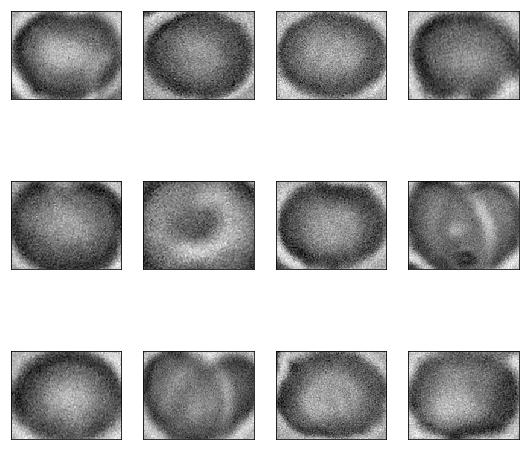

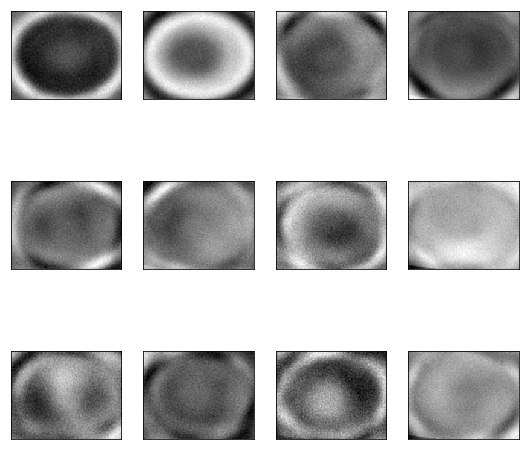

In [34]:
# #############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
  
        plt.xticks(())
        plt.yticks(())



plot_gallery(all_data,  x_mean, y_mean)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces,  x_mean, y_mean)

plt.show()

In [ ]:
#TRY TO DO IT MYSELF ----getting zeros where I shouldn't be 

In [8]:
scatter_matrix = np.zeros((x_mean*y_mean,x_mean*y_mean))
for i in range(no_images):
    print(i)
    scatter_matrix += (vector_img_dict[i] - mean_img_vector).dot((vector_img_dict[i] - mean_img_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [9]:
vector_img_dict[3] - mean_img_vector

array([12.58241758, 15.64010989, 13.59615385, ...,  9.44505495,
        8.76923077,  9.97802198])

In [10]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)



C:\Users\magd21\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\linalg\linalg.py:1270: RuntimeWarning: invalid value encountered in equal
  if not isComplexType(t) and all(w.imag == 0.0):


In [11]:
#Sorting the eigenvectors by decreasing eigenvalues

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

C:\Users\magd21\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in absolute
  after removing the cwd from sys.path.
C:\Users\magd21\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in absolute
  after removing the cwd from sys.path.


1.7191968479954754e+308
9.503236258631695e+302
2.9634236915972188e+296
3.392928688990906e+293
4.2411607242715555e+292
2.2852951694950072e+291
9.765555285558199e+290
2.588599034278125e+288
1.617874396423828e+287
2.911078425122464e+283
9.602458410102948e+281
9.552834362148603e+281
9.54155594758112e+281
9.513088536534335e+281
9.198390818739315e+281
9.155935988689648e+281
8.865340099679661e+281
8.810006306238693e+281
8.494859887623402e+281
8.157361328342446e+281
8.048437480253992e+281
8.048154616891437e+281
7.769187232577662e+281
7.025694688818187e+281
6.640272015793268e+281
6.629015607040303e+281
6.3141808931744e+281
5.505399535225613e+281
5.3409662060152696e+281
5.333024993820977e+281
5.26409858822752e+281
5.1523878841542444e+281
4.975822462613375e+281
4.9366935395201325e+281
4.7771016535375274e+281
4.390852366493819e+281
4.251174942341321e+281
4.229185014636129e+281
4.2099186626796545e+281
4.2084369440163095e+281
4.0781160038278064e+281
4.07458107890534e+281
4.0540189740974894e+281
3.88

3.8231806168233825e+170
3.5134456880713787e+170
3.222267567048681e+170
3.210925364017375e+170
2.9344386511471356e+170
2.616028547873857e+170
2.369131555805092e+170
2.3659403007599674e+170
2.2237657754536228e+170
2.2154966089378038e+170
2.1482763146869527e+170
1.9770462467493141e+170
1.7612124949022104e+170
1.6016619845233883e+170
1.5329607606393665e+170
1.4575138191805772e+170
1.3941389973462445e+170
1.308640902834915e+170
1.3059298157067847e+170
9.613535129821061e+169
9.519576191468873e+169
9.236409001511166e+169
8.845818814589984e+169
8.829620113964311e+169
8.813115397146758e+169
8.42282137651664e+169
8.07176432177395e+169
7.667913607167523e+169
7.342056182905864e+169
6.970539414649517e+169
6.911444267532969e+169
6.109375014183548e+169
5.1665704444311406e+169
2.4249010604642955e+166
2.4244751069561543e+166
2.413681591041982e+166
2.2402558460660572e+166
2.2110664361419504e+166
1.9649065935776442e+166
1.6859991516695227e+166
1.5840554779166336e+166
1.4742040721959146e+166
1.35422801543

6.2858992182959e-310
6.26534026630343e-310
5.9258854458496e-310
5.9027556917388e-310
5.8775039418156e-310
5.6370461503783e-310
5.3237488101639e-310
5.1445594271796e-310
5.1277205256805e-310
5.1125925408488e-310
5.1087048667605e-310
4.61618964366585e-310
4.40402453127365e-310
4.27879231290238e-310
4.18455097716824e-310
4.09057128624376e-310
4.0244336783412e-310
4.0137550387354e-310
3.98373679372233e-310
3.9573804592007e-310
3.69375807333414e-310
3.669142922236e-310
3.5684423443871e-310
3.4369965827835e-310
3.36166527662577e-310
2.96124512685127e-310
2.9580621326056e-310
2.78384627816734e-310
2.7361177568761e-310
2.4661835084094e-310
2.43582108328076e-310
2.12963497581275e-310
2.0844364654652e-310
2.03317648898776e-310
2.0299011736374e-310
1.9267803721641e-310
1.893425464735e-310
1.8905420825104e-310
1.8806375073951e-310
1.87393448300143e-310
1.87055363706924e-310
1.6914428449784e-310
1.67107168538515e-310
1.6623835962309e-310
1.6157057509017e-310
1.60889721169096e-310
1.6080484111411e-3

1.60908454423943e+117
1.593370895692356e+117
9.626077903579093e+116
9.175434506996347e+116
7.659230490374473e+116
7.59925075438121e+116
7.206735167239413e+116
6.472426509086107e+116
6.173647991169512e+116
4.92525077454931e+116
3.358029225221294e+116
5.450027976815396e+115
4.485028679829785e+115
1.0961986506532538e+115
7.348969962326769e+114
3.463066950862842e+113
2.512574165271006e+113
2.3524696333984127e+113
1.6539118855227933e+113
1.4653417852741412e+113
1.4578434631786354e+113
1.4510802198157526e+113
1.2656349684432019e+113
1.1264088744242438e+113
1.0296871528577185e+113
8.885669244361678e+112
5.135170155591451e+112
3.2960737229132544e+112
3.15891353241794e+112
2.801557069847846e+112
2.5695279710612993e+112
2.07062590497713e+112
1.759395052656456e+112
1.0526301189915253e+112
8.043411052187507e+111
3.7293436980419345e+108
3.4455144929533384e+108
3.4054965379749195e+108
3.405449669029405e+108
3.2782436551409827e+108
3.274086338726347e+108
3.139403899143853e+108
2.686451082008098e+108


1.403329161621363e-309
1.395318332349215e-309
1.39381525382566e-309
1.39381171533763e-309
1.393599515758533e-309
1.39172948429296e-309
1.39084092123028e-309
1.390694839210647e-309
1.390693610312135e-309
1.390692381867693e-309
1.390692381867693e-309
1.390692381849195e-309
1.390692381848874e-309
1.390692381848706e-309
1.390692381848706e-309
1.390692381848706e-309
1.390692381848706e-309
1.39067125352372e-309
7.6429088705447e-310
6.9517446831178e-310
6.806089299942e-310
6.79683022513e-310
6.7277876552554e-310
6.71590447908315e-310
6.47633115427423e-310
6.4320361875871e-310
6.273291773379e-310
6.1739467578993e-310
6.17128419826626e-310
6.1501804010093e-310
6.04132201725016e-310
5.95025776801e-310
5.8978751014599e-310
5.88768952170276e-310
5.8396366516883e-310
5.73384482743534e-310
5.67867293620217e-310
5.671033751957e-310
5.6472786502746e-310
5.616710659106e-310
5.616710659106e-310
5.51241384621176e-310
5.47496134354086e-310
5.4367654160321e-310
5.4212748467643e-310
5.36101016648364e-310
5.

4.631345716685941e-299
1.380792126670595e-309
nan
7.884953499821859e+303
5.837037905832174e+303
nan
9.269930796633824e+303
8.585494127214248e+303
1.5718407981771184e+299
nan
6.520203245733183e+303
5.147288227438109e+303
1.6749466099530022e+294
1.2779602373014052e+294
1.2776630242957766e+294
1.238044694387411e+294
5.10972539568181e+279
6.21272657385531e+226
7.276812054333728e-222
nan
nan
2.28003313223374e+265
4.707799130830021e+255
1.4249314048738778e+246
6.815616541459694e+38
2.0880966402144642e-53
1.2338784237089319e-178
1.2790412465667289e-202
1.8480599375449828e-231
7.446121418738184e-246
6.018146866772622e-246
4.435932687119709e-246
1.13142730442673e-255
2.3417174549451526e-260
2.3385401667080335e-260
2.2373090964457268e-260
2.235715028032154e-260
1.9292600363883284e-260
4.18613790134816e-265
3.568930083749629e-265
5.662764689037702e-270
4.977170137847607e-270
3.7853247302184398e-270
3.709521003497167e-270
8.311039237379011e-275
6.51419121482032e-275
6.144750874072146e-275
5.780858

2.2053065883627037e+167
1.1486775962338853e+167
1.134614024637911e+167
9.848612420892617e+166
8.628317923498123e+166
5.934367995405108e+166
1.798362946407462e+166
1.4730633669056646e+166
7.1058029010183894e+165
3.974612480589546e+165
3.887356042470092e+165
2.7338370363652207e+165
1.7538885043992634e+165
1.5201797805081259e+165
1.414962148846026e+165
8.730772378600529e+164
4.5792966485479e+164
2.0518686532069612e+164
1.8002404765977357e+164
1.7919522640883755e+164
1.743564283818541e+164
9.202560290186474e+163
5.7138583083017917e+163
4.2006697072086184e+163
2.8089123158403412e+163
2.7993403514121296e+163
2.6980123123116433e+163
2.675501258875635e+163
1.3178536218561336e+163
1.2202791314485344e+163
7.632168800778035e+162
5.574322917331332e+162
4.579928599339197e+162
4.167804094812985e+162
3.5662227069421918e+162
2.0572387643044876e+162
5.07734336813841e+161
4.3571840690243267e+161
3.926218502119549e+161
3.007286031486475e+161
1.7604349754161643e+161
1.3770850556333302e+161
1.2572627832322

203.75169136942512
203.7516867762003
203.75165343827533
203.74971292086846
203.74779138795972
203.74776827322376
203.74593973742293
203.74583342346662
203.74391863293937
203.74388307113006
203.74388303408648
203.7419437762519
203.73999783199204
203.73999783199204
203.7381459994906
203.7380896916943
203.73615545387548
203.7361126298976
203.73417211264965
203.73229592524265
203.73222742780317
203.73030358130634
203.7302859473983
203.72834593034676
203.72641097022338
203.72449985004224
203.72257222582738
203.72253666029184
203.72071886415884
203.72057182151988
203.7186350092455
203.70891992022786
203.7070285319395
203.70700808019686
203.70697769898123
203.70503101314216
203.70503101314216
203.7032285480899
203.70116715261065
203.6972606089533
203.69356218963503
203.69337540685888
203.6914608272115
203.68962808059274
203.68953303854425
203.6894902047644
203.6894902047644
203.68757362474662
203.68562460431622
203.68394609999302
203.6817198005756
203.6817198005756
203.67406149158444
203.6739

200.77364649339034
200.76978925997614
200.7678182297519
200.7678182297519
200.7678182297519
200.76393302765743
200.76210208943849
200.76004782556302
200.75814997134708
200.75616322498618
200.75616262346858
200.75616262346858
200.75430845574164
200.75422048296272
200.75227742137415
200.75227742137415
200.74842605595083
200.74839406149866
200.74647805071083
200.7446166501007
200.7406434713993
200.74062181509086
200.74062181509086
200.73874088435628
200.73872140853334
200.73673661299642
200.73485267554827
200.72916112681665
200.7251353020742
200.72317112796355
200.72131797152502
200.71786113449994
200.71731060252426
200.71731060252426
200.71537823875477
200.71353505032252
200.71342573885553
200.7115507201838
200.70960340994682
200.70960340994682
200.70565499624095
200.70176979414657
200.6978845920521
200.6923253110978
200.692121557311
200.6920583778002
200.690193764729
200.68430376916402
200.68243780534746
200.68241332210806
200.6823573604067
200.67860785325752
200.67855640362157
200.6785

198.0015543385166
197.99971680085358
197.99964269901125
197.99768148685425
197.9976691364222
197.9957315766117
197.99184728948993
197.99019393418178
197.99003142830827
197.98604341689304
197.9860135301389
197.9841137106451
197.982219858011
197.98212832804444
197.98038061601878
197.97435979188782
197.97435792385556
197.96660433261616
197.96658751966675
197.96510423828576
197.96482381046494
197.96276331812567
197.95881711547787
197.95697563534586
197.956887563216
197.951046711289
197.94720055261595
197.9471615091946
197.9471615091946
197.9471615091946
197.94333731364006
197.94327630710012
197.94327630710012
197.94327630710012
197.93952383494033
197.9374588849095
197.9357731600374
197.9336354551683
197.92988409670838
197.92388934464785
197.92385029662796
197.9219127386977
197.91625622551544
197.91618701175096
197.91219469034468
197.91219469034468
197.9087062530284
197.9080655713309
197.90640968555377
197.90449480067736
197.90443805346024
197.90248588970763
197.9005390840614
197.9005390840

194.8332594325243
194.831471193985
194.82862595787546
194.82752866319754
194.82734422736598
194.82694556490378
194.8196389458601
194.81957382317714
194.81957382317714
194.81584238492835
194.8132220294058
194.81180376766622
194.81180341898826
194.81180341898826
194.81180341898826
194.80990693105338
194.80795544868874
194.80791821689385
194.80791821689385
194.80791821689385
194.80627906166794
194.80600708496985
194.80014781270498
194.79824365608067
194.79822312139365
194.7923774085161
194.78849875460205
194.78072180223282
194.78072180223282
194.77691932912637
194.77295139804394
194.77295139804394
194.7711553595382
194.771025081729
194.76909444505807
194.76719033359595
194.76529821640446
194.76518099385513
194.76324189014463
194.76129579176066
194.75957408911137
194.7571778401278
194.75581406407838
194.75180361622827
194.75158884183284
194.74980392257933
194.74964018547738
194.74780440217097
194.7457549833829
194.7457549833829
194.7457549833829
194.74385587571285
194.74188687264245
194.74

191.30346592771656
191.30346592771656
191.30346592771656
191.3000240222645
191.29181032143327
191.28991199908276
191.28611754686077
191.28610847196538
191.2840399172444
191.28021784681295
191.28015471515
191.27626951305552
191.27379462599347
191.2725561938471
191.27068605160557
191.26866073573095
191.2667106487773
191.2665981875467
191.26072870467783
191.25686260224128
191.25684350258337
191.25360825345857
191.24915660358332
191.2476753479299
191.24521457430708
191.24330079277593
191.24095103822074
191.23936033981917
191.23376025078477
191.2335322900168
191.2317389641688
191.2305709854856
191.23037708142886
191.2297200637178
191.2296470879224
191.2296470879224
191.22772273101194
191.22771278504683
191.22196020079875
191.2209131759734
191.2180318990408
191.21799148163905
191.21616321679824
191.21219139723414
191.21022107745017
191.20834977292105
191.20640047213874
191.20637629522128
191.20633587535576
191.2045237816393
191.20439336312262
191.2028375509888
191.2005230821002
191.198638458

187.30020200580805
187.30003943263011
187.29976542125368
187.29797746703287
187.2978225683576
187.29640336977053
187.2958873113758
187.29393736626318
187.29011664081358
187.2900521641687
187.2900521641687
187.2886012725989
187.288411085043
187.28826198141033
187.28626371933828
187.28616760685424
187.28228175997987
187.2785097617253
187.2784304505339
187.27839655788543
187.27451135579102
187.27113170243302
187.27071900968926
187.27062615369658
187.26880326113613
187.26693283373592
187.26481214437402
187.25917372278502
187.25911397127277
187.25517438000344
187.25508534531886
187.2532496454399
187.2492713371411
187.24925876145454
187.24741977988734
187.24343300397896
187.2430286342564
187.24045148230053
187.23961906786099
187.23954453694114
187.23585840378286
187.23419375206743
187.2337494756225
187.2337320616896
187.23185942965165
187.23179364301058
187.23177413275226
187.2251208347146
187.22414405502192
187.2201737149068
187.22011852646898
187.21431492193486
187.21040553131166
187.20846

182.7443657136838
182.7443657136838
182.74312413976034
182.74048051158934
182.73561058314888
182.73251174993675
182.7290450132059
182.7270385272088
182.72327146097663
182.7212568983075
182.7210545011172
182.71738343153518
182.70994519505382
182.69723758117496
182.69096541686528
182.68823561932953
182.67831727807845
182.6758308689835
182.6705468738896
182.66666167179514
182.65725072634112
182.65500606551186
182.65500606551186
182.65500606551186
182.65500606551186
182.65323008077948
182.65112086341742
182.64723566132298
182.64335045922857
182.6400904472242
182.6386599327777
182.6355802203393
182.6355800550397
182.63364118360465
182.6281594393782
182.62780965085082
182.62780965085082
182.62780965085082
182.6259602940515
182.6239244487564
182.61844266083085
182.61627013853192
182.6150842738554
182.6126263068366
182.61226884247313
182.61042751174486
182.606522886011
182.60093331724102
182.5988269677844
182.59490820572375
182.59284283200097
182.59284283200097
182.59105152738087
182.590907764

178.3263579742933
178.32325667086087
178.3194263276454
178.31563357234612
178.31523536835792
178.3152353260318
178.3152353260318
178.31383798615568
178.31344257171176
178.31155752647783
178.31135012393736
178.31135012393736
178.31135012393736
178.31135012393736
178.30949904557883
178.30755842436153
178.30746492184292
178.30705842447023
178.30427323539706
178.30408262891748
178.29969451765407
178.29969451765407
178.29615985626387
178.29580931555964
178.29222280558784
178.29201762413393
178.2919241134652
178.2919241134652
178.2899861795371
178.28523744436308
178.2842512457039
178.28237122589758
178.28026850718192
178.27833252096494
178.2763904597658
178.27638330508748
178.27638330508748
178.27638330508748
178.27249810299304
178.2691067215601
178.26867312558528
178.2686562542076
178.26862373922685
178.2686129008986
178.26678699305012
178.26114839620246
178.25926216287962
178.2570392648157
178.25695729461532
178.25532421257893
178.25513588248185
178.25307209252088
178.24930582860125
178.24

2.086804449629567e-39
1.3180067814774132e-39
7.893362012492105e-40
7.435075620245997e-40
3.4348184335321766e-40
2.971969875974733e-40
2.4315180043209946e-40
1.6146663750114698e-40
1.3669223084703814e-40
5.83519229154834e-41
3.184674583079496e-41
9.617820081389625e-42
3.032041936418878e-42
2.484093934807133e-42
9.241789885462871e-43
7.638232980806868e-43
5.1764615956531405e-43
1.391378617971244e-43
1.349425744453791e-43
6.010905815534673e-44
3.8199423243058897e-44
2.1502688067741169e-44
7.748620441565088e-45
6.986631186590192e-45
6.104577980723145e-45
5.1575666189691445e-45
4.4856274429571854e-45
3.128597664931471e-45
1.525380777740065e-45
9.410983546041676e-46
7.348752651464022e-46
7.138917910461811e-46
3.3692975093135772e-46
2.076621351102685e-46
1.6253874154498096e-46
9.158220216173085e-48
4.548769393120317e-48
3.97993848709498e-48
8.46238049722485e-49
6.03813652193467e-49
5.9388356322997014e-49
3.9023495781734284e-49
2.9027813489978957e-49
2.3599474866024566e-49
1.4751857921285902e-

In [12]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(y_mean*x_mean,1), eig_pairs[1][1].reshape(y_mean*x_mean,1), eig_pairs[2][1].reshape(y_mean*x_mean,1), eig_pairs[3][1].reshape(y_mean*x_mean,1), eig_pairs[4][1].reshape(y_mean*x_mean,1), eig_pairs[5][1].reshape(y_mean*x_mean,1), eig_pairs[6][1].reshape(y_mean*x_mean,1), eig_pairs[7][1].reshape(y_mean*x_mean,1), eig_pairs[8][1].reshape(y_mean*x_mean,1), eig_pairs[9][1].reshape(y_mean*x_mean,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]


In [13]:
transformed_vector_dict={}
for i in range(no_images):
    v=vector_img_dict[i]
    transformed_vector_dict[i]= matrix_w.T@v
    print(transformed_vector_dict[i].shape)




(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,

In [16]:
transformed_vector_dict[3]

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j])